# Pandas Basics

- Importing Data
- Head and Tail
- loc vs iloc vs []
- Data Imputation

# Importing Data / Reading CSV

We will use the <TT>Credit</TT> dataset, which you can download from Canvas.  The dataset is taken from the  <a href="https://www.statlearning.com" target="_blank">Introduction to Statistical Learning</a> texbook by James, Witten, Hastie and Tibshirani. It records the average credit card balace at end of the month for customers of a financial services company, as well as other individual characteristics such age, education, gender, marital status, number of cards, and credit rating.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Credit.csv')

In [3]:
data.head()

,Obs,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
data = pd.read_csv('Credit.csv', index_col='Obs')
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


# Indexing and Slicing

Like numpy arrays and lists, you can index dataframes in a very similar fashion to numpy arrays but a bit differently. Like indexing and slicing, indexing dataframes are very important so be sure you understand how to use it.

The best way to understanding indexing is to understand how to read them.

### Using Normal Indexing

In [5]:
data['Income']  # Read as data at Income

Obs
1       14.891
2      106.025
3      104.593
4      148.924
5       55.882
        ...   
396     12.096
397     13.364
398     57.872
399     37.728
400     18.701
Name: Income, Length: 400, dtype: float64

In [6]:
data[['Income', 'Education', 'Ethnicity']].head()  # Read as data at Income, Education and Ethnicity

,Income,Education,Ethnicity
Obs,,,
1,14.891,11,Caucasian
2,106.025,15,Asian
3,104.593,11,Asian
4,148.924,11,Asian
5,55.882,16,Caucasian


In [7]:
# Instead you can store the columns you want as a list
names = ['Income', 'Education', 'Ethnicity']
data[names].head()

,Income,Education,Ethnicity
Obs,,,
1,14.891,11,Caucasian
2,106.025,15,Asian
3,104.593,11,Asian
4,148.924,11,Asian
5,55.882,16,Caucasian


# `iloc` and `loc`

In total there are 3 ways to index dataframes. Using `[]`, `iloc` and `loc`.

The main difference is that `iloc` stands for integer-location, while `loc` stands for location. To make it clear, let us use an example



In [8]:
import numpy as np
import pandas as pd

# Don't worry about this code
df = pd.DataFrame(index=[x for x in 'abcde'])
df['col1'] = [f'{x}_col1' for x in 'abcde']
df['col2'] = [f'{x}_col2' for x in 'abcde']
df

,col1,col2
a,a_col1,a_col2
b,b_col1,b_col2
c,c_col1,c_col2
d,d_col1,d_col2
e,e_col1,e_col2


In [9]:
print('position (0, 1): ', df.iloc[0, 1])  # 0 row, 1 column
print('position (4, 0): ', df.iloc[4, 0])  # 4 row, 0 column

position (0, 1):  a_col2
position (4, 0):  e_col1


In [10]:
print('position (a, col1): ', df.loc['a', 'col1'])  # a row, col1 column
print('position (d, col2): ', df.loc['d', 'col2'])  # d row, col2, column

position (a, col1):  a_col1
position (d, col2):  d_col2


In [11]:
print('position (a, col1): ', df.iloc['a', 'col1'])  # a row, col1 column
print('position (d, col2): ', df.iloc['d', 'col2'])  # d row, col2, column

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [ ]:
print('position (0, 1): ', df.loc[0, 1])  # 0 row, 1 column
print('position (4, 0): ', df.loc[4, 0])  # 4 row, 0 column

In [12]:
df

,col1,col2
a,a_col1,a_col2
b,b_col1,b_col2
c,c_col1,c_col2
d,d_col1,d_col2
e,e_col1,e_col2


So with `loc` you need to use the exact labels as it occurs in the DataFrame, while `iloc` requires that you use the actual index (or number) at where you want

**c) Selecting a column by a numerical index**

The <TT>iloc</TT> method allows us to select data by numerical indexes. We just have to be careful not be confused by zero indexing. If want the first column then the index needs to be zero. The following is equivalent to what we did above. 

In [13]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [14]:
data.iloc[:, 3]  # row: all, column: 3

Obs
1      2
2      3
3      4
4      3
5      2
      ..
396    3
397    5
398    5
399    1
400    5
Name: Cards, Length: 400, dtype: int64

**d) Selecting multiple columns by numerical indexes**

Here, we pass a list of column numbers for indexing. 

In [15]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [16]:
data.iloc[:, [0, 5]].head()  # row: all, column: 0, 5

,Income,Education
Obs,,
1,14.891,11
2,106.025,15
3,104.593,11
4,148.924,11
5,55.882,16


In [17]:
# Notice how the order is determined by how you specifiy
data.iloc[:, [5, 0]].head()  # row: all, column: 5, 0

,Education,Income
Obs,,
1,11,14.891
2,15,106.025
3,11,104.593
4,11,148.924
5,16,55.882


**Slicing**

In [18]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [19]:
data.iloc[:, 0:6].head()  # row: all, column: start 0 - end right before 6 

,Income,Limit,Rating,Cards,Age,Education
Obs,,,,,,
1,14.891,3606,283,2,34,11
2,106.025,6645,483,3,82,15
3,104.593,7075,514,4,71,11
4,148.924,9504,681,3,36,11
5,55.882,4897,357,2,68,16


**e) Selecting rows by labels**

The loc method alows one to select rows by the designated index labels (<TT>Obs</TT>). 

In [20]:
data.loc[[1,2,5], :]  # Row: 1, 2, 5; Column: all

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [21]:
data.loc[1:4, :]  # Row: start 1 - end including 4; Column: all

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964


**f) Selecting rows by numerical index**

This is useful when the index variable is a string or date. Here we are back to zero indexing. 

In [22]:
data.iloc[0:2, :]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


### Something to Note when using `loc` and `iloc`

Notice the difference between `loc` and `iloc`

In [23]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [24]:
data.iloc[1:3, :]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [25]:
data.loc[1:3, :]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


This might make it clearer

In [26]:
data.loc[:, 'Rating':'Student'].head()

,Rating,Cards,Age,Education,Gender,Student
Obs,,,,,,
1,283,2,34,11,Male,No
2,483,3,82,15,Female,Yes
3,514,4,71,11,Male,No
4,681,3,36,11,Female,No
5,357,2,68,16,Male,No


With `data.iloc[1:3, :]` it means to start at index 1 and end RIGHT BEFORE 3, but don't include index 3.

With `data.loc[1:3, :]` it means to start and location (not index) 1 and end AT 3, so you include 3.

It is more clear with `data.loc[:, 'Rating':'Student']`. You can see that we start at `Rating` and we pick the columns until we end at `Student`, while keeping the `Student` column

This is a very slight difference, and it will probably never affect you. But if you ever want to slice the data, it is usually wise to use `iloc` over `loc`. 

**Conditional Selection**

Here we now consider the case where we want to select the rows based on a specific condition. In particular, suppose we only wanted the Females of this data set. To do this we would do

In [27]:
data.loc[data['Gender'] == 'Female']

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
7,20.996,3388,259,2,37,12,Female,No,No,African American,203
9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350
...,...,...,...,...,...,...,...,...,...,...,...
389,37.878,6827,482,2,80,13,Female,No,No,Caucasian,1129
391,135.118,10578,747,3,81,15,Female,No,Yes,Asian,1393
392,73.327,6555,472,2,43,15,Female,No,No,Caucasian,721


But what did this just do. So 

In [28]:
data['Gender'] == 'Female'

Obs
1      False
2       True
3      False
4       True
5      False
       ...  
396    False
397    False
398     True
399    False
400     True
Name: Gender, Length: 400, dtype: bool

In [29]:
data.loc[data['Gender'] == 'Female'].head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
7,20.996,3388,259,2,37,12,Female,No,No,African American,203
9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


Learning how to read this, 
1. First `data.loc` is data at the location
2. Second `data['Gender'] == 'Female'`. Recall, row is always first. Therefore we want the rows where `data['Gender'] == 'Female'`, or where gender is female
3. In total this gives, we want the data at the location where gender is female

**Assigning New Values**

It will be clear later why I am showing this, but suppose we wanted to swap `'Female' -> 'F'`.

In [30]:
temp_data = data.copy()

In [31]:
temp_data.loc[data['Gender'] == 'Female'] = 'F'
temp_data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,F,F,F,F,F,F,F,F,F,F,F
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,F,F,F,F,F,F,F,F,F,F,F
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


That's weird, it changed every column not just the gender column. What we actually need to do this this

In [32]:
temp_data = data.copy()

In [33]:
temp_data.loc[data['Gender'] == 'Female', 'Gender'] = 'F'
temp_data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,F,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,F,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Notice the difference between 
1. `temp_data.loc[data['Gender'] == 'Female'] = 'F'` and 
2. `temp_data.loc[data['Gender'] == 'Female', 'Gender'] = 'F'`

In the second one we actually specify the column we want to change. But in the first, we don't specify the column. In the first, this will therefore default to `temp_data.loc[data['Gender'] == 'Female', :] = 'F'` - meaning that we set all columns to be `'F'` not just the gender column.

# This will probably be for Week 3

# Data Imputation

In the tutorials we will not be teaching data imputation, but it is very important when working with real world data. The general idea is that data is never clean. There is going to be missing values, wrong values, maybe even troll values. 

Think of filling in a survey, it is very easy to fill the survey with wrong values, or even just skip some questions all together. As data scientists, we need to think about how to fix these issues. Here we will see how to fix missing values. This is known as data imputation.

More advanced data imputation techniques can be found here https://www.kaggle.com/residentmario/simple-techniques-for-missing-data-imputation

This tutorial is inspired by https://towardsdatascience.com/pandas-tricks-for-imputing-missing-data-63da3d14c0d6. The dataset we use here is taken from https://www.kaggle.com/pabloa/wine-magazine/code

### Finding and Counting Missing Data

Here we are working with a wine dataset, and we simply want to impute the price. Meaning that some wines will have missing prices, and our job is to fill in those missing values.

In [34]:
import pandas as pd
df = pd.read_csv("winemag-data_first150k_v2.csv")

In [35]:
df.head()

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points
0,US,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,94
1,Spain,Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,92
2,US,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,100
3,US,Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,94
4,France,La Brûlade,95.0,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,94


The quick way to find, and count the missing values is

In [36]:
df.isnull()

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
144032,False,True,False,False,False,False,True,False,False,False
144033,False,False,False,False,False,False,True,False,False,False
144034,False,False,False,False,False,False,True,False,False,False
144035,False,False,False,False,False,False,True,False,False,False


In [37]:
df.isnull().sum()

country                 2
designation         43826
points                  5
price               13396
province                7
region_1            23845
region_2            85659
variety                 5
winery                  5
last_year_points        0
dtype: int64

But here we are only interested in the prices. So if we wanted the rows only will null prices

In [38]:
df.loc[df['price'].isnull()].head()

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points
32,Italy,Vigna Piaggia,90.0,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga,89
56,France,Le Pavé,90.0,NaN,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Domaine Vacheron,80
72,Italy,Bussia Riserva,91.0,NaN,Piedmont,Barolo,NaN,Nebbiolo,Silvano Bolmida,90
82,Italy,Palliano Riserva,91.0,NaN,Piedmont,Roero,NaN,Nebbiolo,Ceste,92
116,Spain,Dulce Tinto,86.0,NaN,Levante,Jumilla,NaN,Monastrell,Casa de la Ermita,88


So lets stop to think why this works. So we 
1. First we are asking `df.loc`, meaning the dataframe at the location
2. Then we ask `df['price'].isnull()`, meaning `df['price']` is null. Or where the `'price'` column is null.
3. In total, `df.loc[df['price'].isnull()]` asks for the dataframe at the location where the price is null

Hence it only returns the rows where the price is null.

### Mean Imputation

The simpliest imputation is the mean inputation, where we will simply fill the nan rows with the mean of the non-nan rows.

In [39]:
# Notice that pandas is smart enough to to mean the nan rows
df.loc[:, 'price'].mean()

33.12339923913626

In [40]:
# If you don't trust what I said in the above cell (which you shouldn't)
# you can see for yourself here
df.loc[~df['price'].isnull(), 'price'].mean()

33.12339923913626

In [41]:
# Remember to say which column you want to change!
df.loc[df['price'].isnull(), 'price'] = df.loc[:, 'price'].mean()

In [42]:
df.isnull().sum()

country                 2
designation         43826
points                  5
price                   0
province                7
region_1            23845
region_2            85659
variety                 5
winery                  5
last_year_points        0
dtype: int64

No null prices!

# Imputation by Country

So what we did above is simply took the average of all wines and filled in the missing values with that. While this works, this isn't very smart.

Using basic data analysis we can see that the average wine price actually depends on where it was created

In [43]:
df = pd.read_csv("winemag-data_first150k.csv", sep = ";")

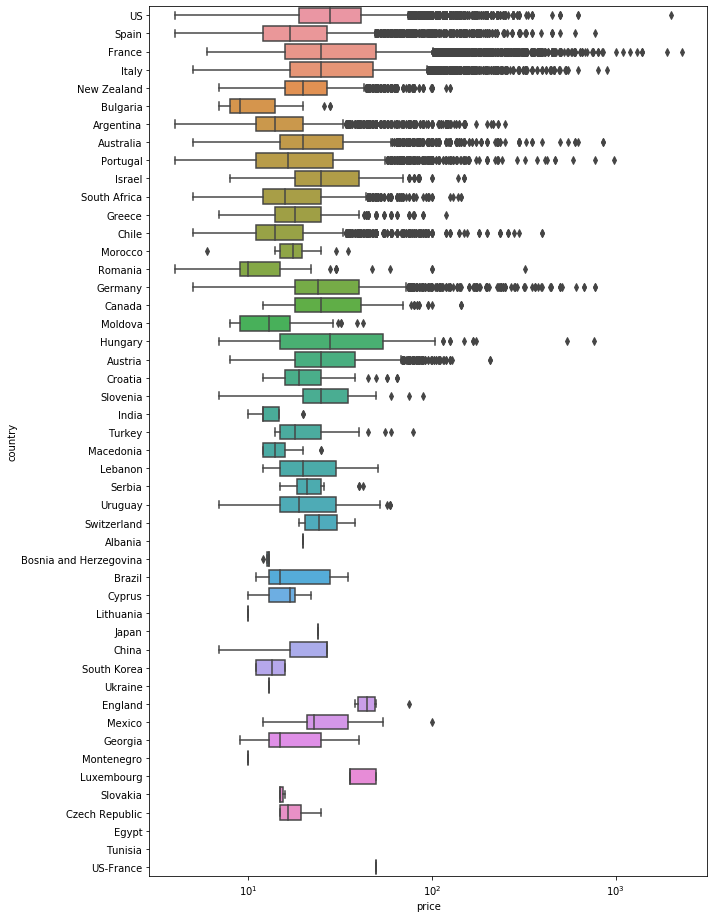

In [44]:
# Don't worry about this code
# If you do want to worry, then ask on ed

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 16))
sns.boxplot(y='country', x='price', data=df, ax=ax)
ax.set_xscale('symlog')

So what if we filled the missing values with the countries average price. 

As a technical note, a lot of these are right skewed. So you would want to fix this before you use mean inputation. Just 2 quick ways to fix this (but there are many more ways to do this)
1. Log-transform price before imputation
2. Use more predictors, not just the country

In [45]:
df.head()

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points
0,US,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,94
1,Spain,Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,92
2,US,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,100
3,US,Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,94
4,France,La Brûlade,95.0,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,94


In [46]:
# Gets the unique values in a column
df['country'].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [47]:
unique_countries = df['country'].unique()
for country in unique_countries:
    mean_price = df.loc[df['country'] == country, 'price'].mean()
    df.loc[df['country'] == country, 'price'] = mean_price

In [48]:
df.isnull().sum()

country                 2
designation         43826
points                  5
price                   5
province                7
region_1            23845
region_2            85659
variety                 5
winery                  5
last_year_points        0
dtype: int64

In [49]:
df.loc[df['price'].isnull()]

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points
114188,Egypt,Caspar Blanc de Noirs,84.0,NaN,Egypt,NaN,NaN,Grenache,Sahara Vineyards,91
114213,Egypt,Caspar,84.0,NaN,Egypt,NaN,NaN,Chenin Blanc,Sahara Vineyards,98
115051,Egypt,NaN,83.0,NaN,Egypt,NaN,NaN,Viognier,Sahara Vineyards,97
132359,Tunisia,Selian Mystère,87.0,NaN,Tunisia,NaN,NaN,Rosé,Domaine Neferis,81
134014,Tunisia,Selian,85.0,NaN,Tunisia,NaN,NaN,White Blend,Domaine Neferis,94


Note that there are more advanced ways to do data imputation, but I'll leave this for you to look at.

# Questions

I don't have any questions this week as it is quite hard to make questions on pandas. But, I highly encourage all to read more on data imputation and take a look at the following link to improve your pandas skills

https://old.reddit.com/r/Python/comments/lain0r/hey_reddit_heres_my_comprehensive_course_on/

